## Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Netflix dataset

In [2]:
netflix_data = pd.read_csv(r"C:\Users\Shweta\Desktop\Python\netflix_data_kaggle.csv")

## Display the first few rows of the dataset

In [3]:
print(netflix_data.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

## Check for missing values

In [4]:
print(netflix_data.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


## To know total number of rows present

In [5]:
num_rows = netflix_data.shape[0]
print(f"The Netflix dataset has {num_rows} rows.")

The Netflix dataset has 8807 rows.


## Visualize missing data with a heatmap

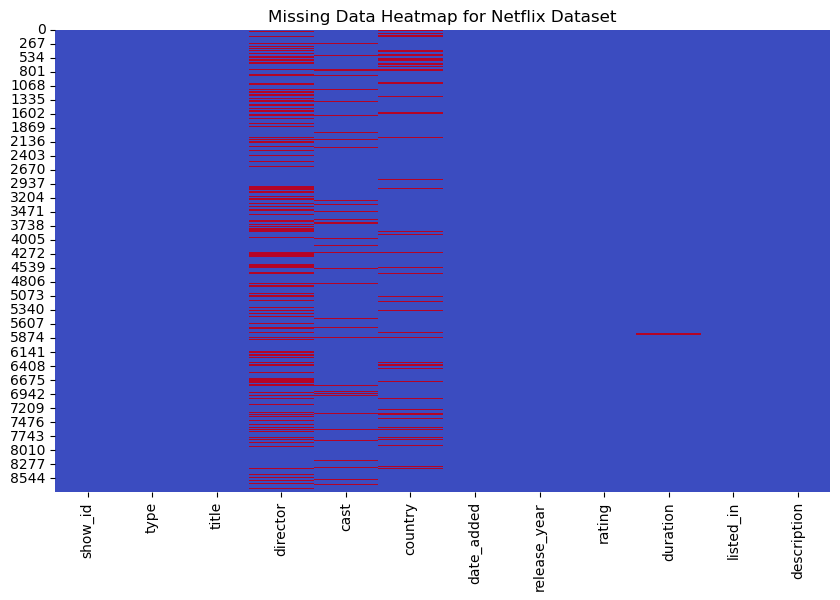

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(netflix_data.isnull(), cmap='coolwarm', cbar=False)
plt.title('Missing Data Heatmap for Netflix Dataset')
plt.show()

## Drop rows with missing values

In [8]:
netflix_data.dropna(subset=['director','country', 'rating','duration'], inplace=True)

## Check for missing values again

In [9]:
print(netflix_data.isnull().sum())

show_id           0
type              0
title             0
director          0
cast            415
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64


## Populate missing values of cast as 'Unknown'

In [10]:
netflix_data['cast'].fillna('Unknown', inplace=True)

## Treating Duplicates

In [11]:
netflix_data.drop_duplicates(inplace=True)

In [12]:
num_rows = netflix_data.shape[0]
print(f"The Netflix dataset has {num_rows} rows.")

The Netflix dataset has 5747 rows.


## Counting the number of shows/movies by country

In [13]:
country_counts = netflix_data['country'].value_counts().head(10)
print("Top 10 countries with the most shows/movies on Netflix:")
print(country_counts)

Top 10 countries with the most shows/movies on Netflix:
United States     2045
India              890
United Kingdom     212
Canada             119
Spain              106
Nigeria             90
Egypt               90
Japan               85
France              81
Turkey              79
Name: country, dtype: int64


In [14]:
## Visualize Top 10 Countries with the Most Shows/Movies on Netflix

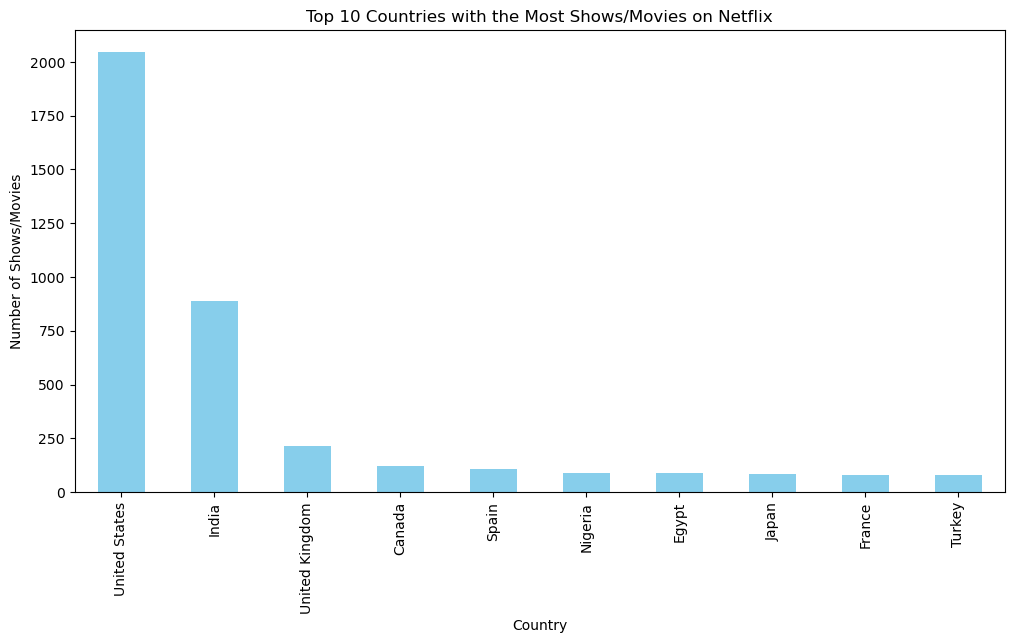

In [15]:
plt.figure(figsize=(12, 6))
country_counts = netflix_data['country'].value_counts().head(10)
country_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with the Most Shows/Movies on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Shows/Movies')
plt.show()

## Distribution of Types on Netflix

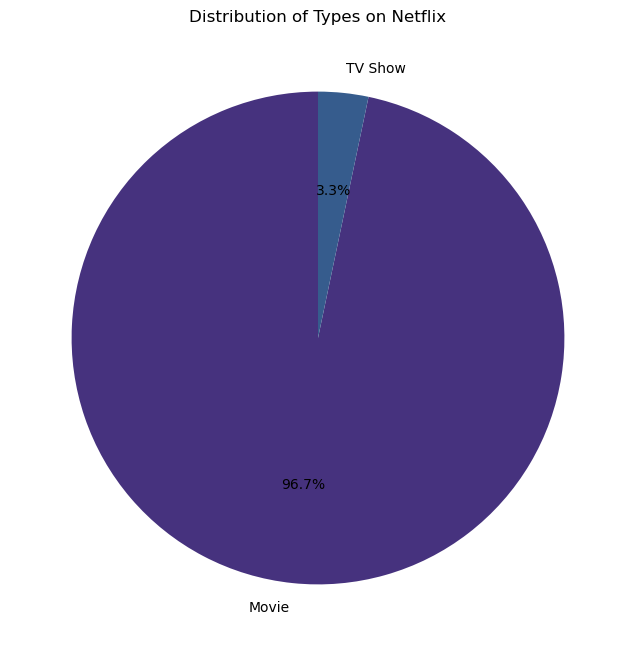

In [18]:
type_counts = netflix_data['type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=90)
plt.title('Distribution of Types on Netflix')
plt.show()

## Distribution of Ratings on Netflix

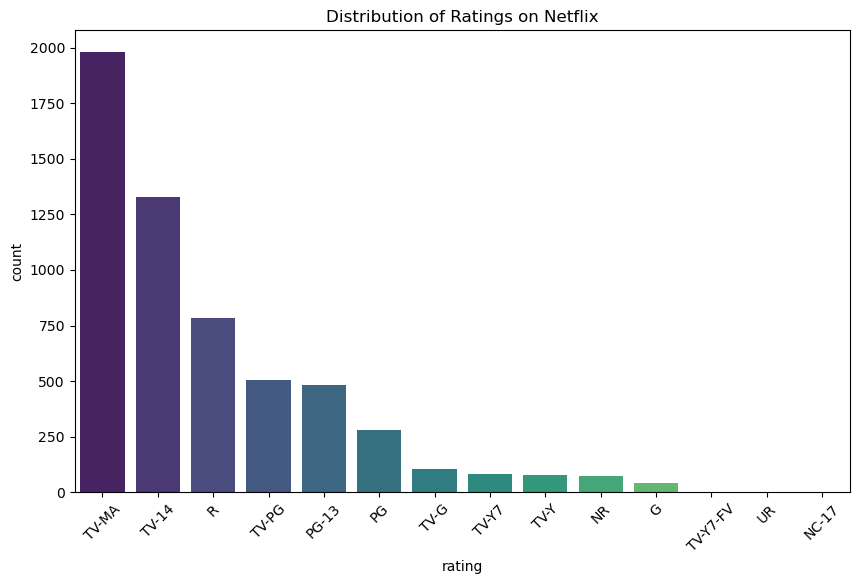

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=netflix_data, order=netflix_data['rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Ratings on Netflix')
plt.xticks(rotation=45)
plt.show()

## Distribution of Release years on Netflix

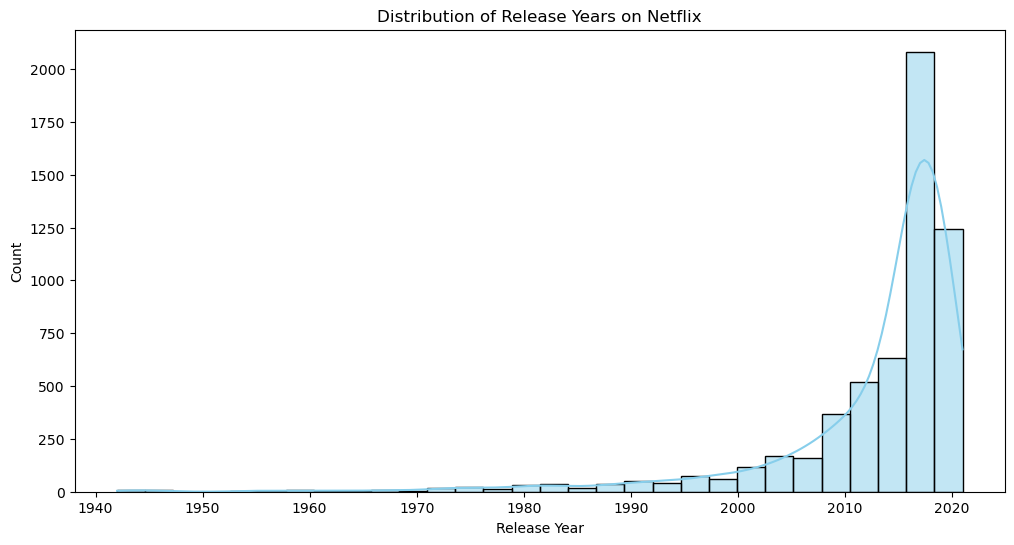

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(x='release_year', data=netflix_data, kde=True, bins=30, color='skyblue')
plt.title('Distribution of Release Years on Netflix')
plt.xlabel('Release Year')
plt.show()

## Split the 'listed_in' column

In [28]:
listed_in_split = netflix_data['listed_in'].str.split(',', expand=True)

In [29]:
print(listed_in_split.head())

                   0                      1                      2
0      Documentaries                   None                   None
7             Dramas     Independent Movies   International Movies
8   British TV Shows             Reality TV                   None
9           Comedies                 Dramas                   None
12            Dramas   International Movies                   None


## Genre count

In [30]:
genre_counts = listed_in_split.apply(lambda x: x.value_counts(), axis=1).fillna(0)

In [31]:
top_genres = genre_counts.sum().sort_values(ascending=False).head(10)
print("Top 10 Genres on Netflix:")
print(top_genres)

Top 10 Genres on Netflix:
 International Movies       2395.0
Dramas                      1519.0
Comedies                    1128.0
Action & Adventure           809.0
 Dramas                      778.0
Documentaries                720.0
 Independent Movies          720.0
 Romantic Movies             577.0
 Thrillers                   485.0
Children & Family Movies     479.0
dtype: float64


## Visualize the Distribution of Genre

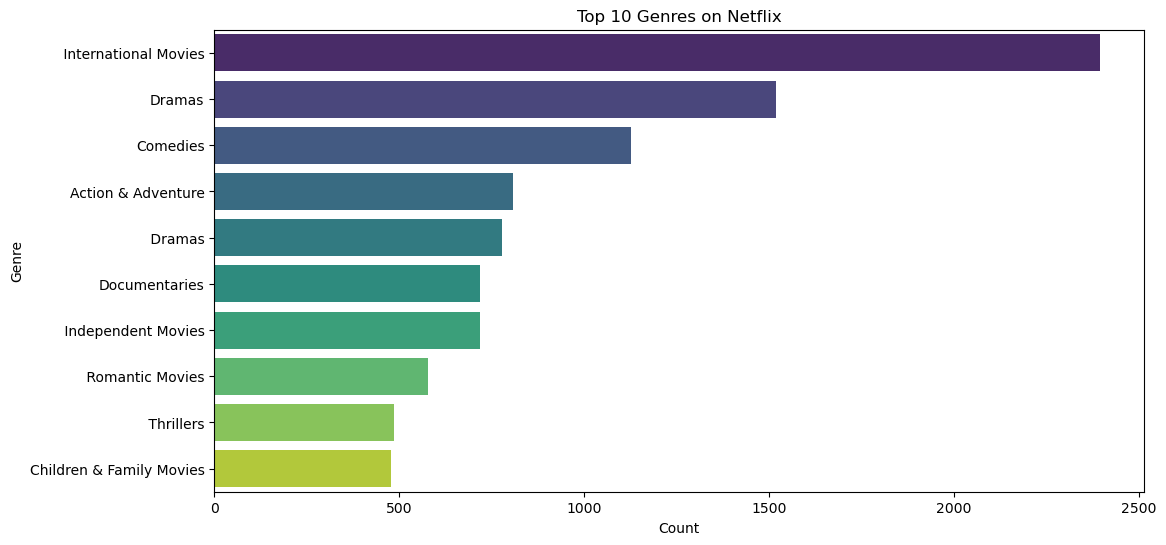

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()